#### We will go throughan example where we will be providing a sinusoidal wave and given some points of the waveto training and asking the model to predict the the extension of it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [25]:
class CreateTimeDataseries():
    def __init__(self,xmin,xmax,num_points):
        self.xmin=xmin
        self.xmax=xmax
        self.num_points=num_points
        # We will get the linspace point i.e the distance between two points
        self.point_distance=(xmax-xmin) /num_points
        self.x_data=np.linspace(xmin,xmax,num_points)
        self.y_true=np.sin(self.x_data)
    
    def ret_true(self,x_data):
        return np.sin(x_data)
    
    def next_batch(self,batch_size,steps):
        # We will find some point within the curve 
        ## first we will find a random value
        random_point=np.random.rand(batch_size,1)
        timeseries_start=random_point * (self.xmax - self.xmin - (steps*self.point_distance))
        
        #How much distance can a last point can increment
        point_distance=steps*self.point_distance
        # We will add that point distance to the time start and then take the linspace
        ## with steps
        batch_timeseries=np.linspace(timeseries_start,timeseries_start+point_distance,steps)
        
        y_batch=np.sin(batch_timeseries)
        
        return y_batch,batch_timeseries

In [26]:
ts_data=CreateTimeDataseries(0,10,250)

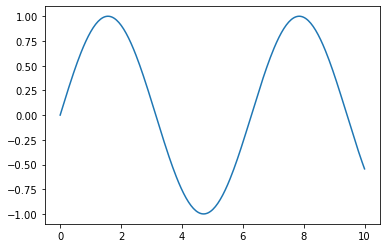

In [27]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [28]:
batch_size=1
steps=30
y1,batch_timeseries=ts_data.next_batch(batch_size,steps)

In [29]:
y1.shape,batch_timeseries.shape

((30, 1, 1), (30, 1, 1))

In [30]:
y1_reshape=y1.reshape((-1,steps))
batch_timeseries_reshape=batch_timeseries.reshape((-1,steps))

In [32]:
y1_reshape.shape

(1, 30)

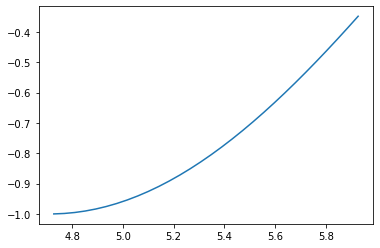

In [37]:
plt.plot(batch_timeseries_reshape.flatten(),y1_reshape.flatten())

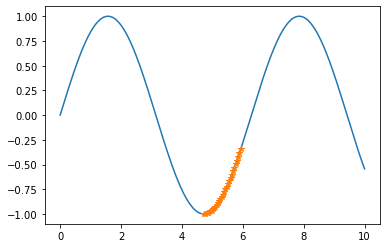

In [39]:
## Lets plot with the actual curve
plt.plot(ts_data.x_data,ts_data.y_true)
plt.plot(batch_timeseries_reshape.flatten(),y1_reshape.flatten(),'*')